In [1]:
import pandas as pd
import numpy as np
import recmetrics
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test.csv', encoding='utf-8')

K = 10

In [3]:
test


,user_id,actual,recommendations
0,0,[95],"[9, 38, 32, 160, 0, 61, 179, 180, 95, 667]"
1,1,"[8, 25, 271]","[8, 25, 271, 0, 948, 412, 947, 1146, 826, 775]"
2,2,"[15, 136, 195]","[9, 195, 24, 136, 79, 282, 281, 15, 283, 372]"
3,3,"[21, 109, 313]","[109, 0, 313, 51, 21, 53, 356, 142, 445, 978]"
4,4,[0],"[11, 132, 118, 61, 97, 999999, 388, 121, 147, ..."
...,...,...,...
4887,4887,[1259],"[1259, 470, 1361, 1362, 893, 1048, 557, 22, 26..."
4888,4888,[1338],"[999999, 587, 216, 978, 72, 317, 332, 820, 561..."
4889,4889,[1368],"[1368, 759, 1024, 228, 897, 499, 518, 274, 331..."
4890,4890,[1448],"[1448, 889, 43, 164, 297, 800, 1127, 1002, 133..."


## recall

In [4]:
actual = test.actual.values.tolist()
predictions = test.recommendations.values.tolist()

pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, predictions, k=K)])
pop_mark

[0.08626700395743432,
 0.16245297711790768,
 0.22736431390105355,
 0.2780513621284779,
 0.3240272743780057,
 0.36048731044246773,
 0.38443753995789803,
 0.39449615276004246,
 0.40177012477890894,
 0.41338058908465347]

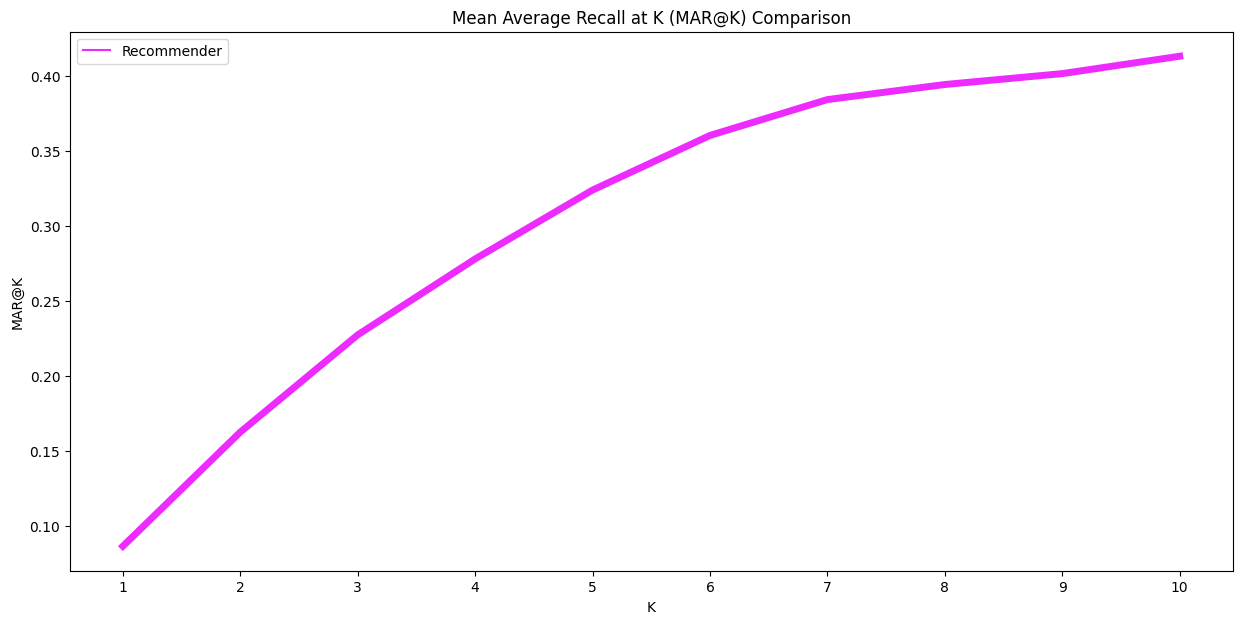

In [5]:
mark_scores = [pop_mark]
index = range(1,10+1)
names = ['Recommender']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

In [ ]:
def add_new_metric(df, name, func):
    df[name]=None
    for userid in df["user_id"].unique():
        test_list = df[df["user_id"]==userid].actual.values[0].replace('[', '').replace(']', '')
        recs_list = df[df["user_id"]==userid].recommendations.values[0].replace('[', '').replace(']', '')
        test_list = [int(x.strip()) for x in test_list.split(',') if x.strip()]
        recs_list = [int(x.strip()) for x in recs_list.split(',') if x.strip()]
        df.loc[df["user_id"]==userid, "recall"] = func(test_list,recs_list)
    return df

In [6]:
test_df = test.copy()

# recall

In [7]:
def recall_func(test_list,recs_list): # tp/(tp+fn)
    actual = set(test_list)
    predicted = set(recs_list)
    tp_set = actual & predicted
    fn_set = actual - tp_set
    tp = len(tp_set)
    fn = len(fn_set)
    return tp/(tp+fn)




In [18]:
test_df = add_new_metric(test_df, "recall", recall_func)

pd.set_option('display.max_colwidth', None)
test_df.head(20)

,user_id,actual,recommendations,recall
0,0,[95],"[9, 38, 32, 160, 0, 61, 179, 180, 95, 667]",1.0
1,1,"[8, 25, 271]","[8, 25, 271, 0, 948, 412, 947, 1146, 826, 775]",1.0
2,2,"[15, 136, 195]","[9, 195, 24, 136, 79, 282, 281, 15, 283, 372]",1.0
3,3,"[21, 109, 313]","[109, 0, 313, 51, 21, 53, 356, 142, 445, 978]",1.0
4,4,[0],"[11, 132, 118, 61, 97, 999999, 388, 121, 147, 193]",0.0
5,5,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
6,6,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
7,7,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
8,8,"[0, 188, 352]","[188, 538, 612, 157, 227, 518, 126, 566, 73, 533]",0.333333
9,9,"[38, 60]","[38, 60, 86, 64, 9, 0, 146, 145, 833, 402]",1.0


In [9]:
test_df.recall.mean()

0.8965933357563526

In [10]:
pd.set_option('display.max_colwidth', None)
test_df.head(30)

,user_id,actual,recommendations,recall
0,0,[95],"[9, 38, 32, 160, 0, 61, 179, 180, 95, 667]",1.0
1,1,"[8, 25, 271]","[8, 25, 271, 0, 948, 412, 947, 1146, 826, 775]",1.0
2,2,"[15, 136, 195]","[9, 195, 24, 136, 79, 282, 281, 15, 283, 372]",1.0
3,3,"[21, 109, 313]","[109, 0, 313, 51, 21, 53, 356, 142, 445, 978]",1.0
4,4,[0],"[11, 132, 118, 61, 97, 999999, 388, 121, 147, 193]",0.0
5,5,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
6,6,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
7,7,[0],"[0, 142, 445, 313, 542, 913, 180, 482, 556, 388]",1.0
8,8,"[0, 188, 352]","[188, 538, 612, 157, 227, 518, 126, 566, 73, 533]",0.333333
9,9,"[38, 60]","[38, 60, 86, 64, 9, 0, 146, 145, 833, 402]",1.0


In [11]:
actual = set([0])
predicted = set([11, 132, 118, 61, 97, 999999, 388, 121, 147, 193])
tp_set = actual & predicted
fn_set = actual - tp_set
tp = len(tp_set)
fn = len(fn_set)
tp/(tp+fn)

0.0

In [12]:
df = test_df.copy()
userid=4

test_list = df[df["user_id"]==userid].actual.values[0].replace('[', '').replace(']', '')
recs_list = df[df["user_id"]==userid].recommendations.values[0].replace('[', '').replace(']', '')
test_list = [int(x.strip()) for x in test_list.split(',') if x.strip()]
recs_list = [int(x.strip()) for x in recs_list.split(',') if x.strip()]

print("test:",test_list)
print("recs:",recs_list)
type(recs_list)

test: [0]
recs: [11, 132, 118, 61, 97, 999999, 388, 121, 147, 193]


list

In [13]:
actual = set(test_list)
predicted = set(recs_list)
tp_set = actual & predicted
fn_set = actual - tp_set
tp = len(tp_set)
fn = len(fn_set)
tp/(tp+fn)



0.0

In [14]:
predicted

{11, 61, 97, 118, 121, 132, 147, 193, 388, 999999}

In [15]:
actual

{0}

In [16]:
actual

{0}

In [17]:
tp_set

set()

# map

# precision